In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *

In [15]:
path = Path('/home/jupyter/mushrooms')

np.random.seed(42)
data = ImageDataBunch.from_csv(path, train="data", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=10, num_workers=1).normalize(imagenet_stats)

In [16]:
# Add feature hoo
class StoreHook(HookCallback):
    def on_train_begin(self, **kwargs):
        super().on_train_begin(**kwargs)
        self.acts = []
    def hook(self, m, i, o): return o
    def on_train_end(self, train, **kwargs): self.acts = self.hooks.stored
        
learn = create_cnn(data, models.resnet34, metrics=accuracy, callback_fns=StoreHook)
learn.load('3_resnet34_defaults')

# Run one iteration to get the hooks

learn.fit_one_cycle(1)

# img = open_image(path/'data'/'gewoon eekhoorntjesbrood'/'6. gewoon%20eekhoorntjesbrood.jpg')
# pred_class,pred_idx,outputs = learn.predict(img)
# pred_class

Total time: 00:08
epoch  train_loss  valid_loss  accuracy
1      0.264017    0.183882    0.971429  (00:08)



In [24]:
# Show conv2d layer activation function
def show_conv2d_act(l=0, nrows=3, ncols=9, s=12, cmap='gist_heat'):
    '''Show p*p activation visualizations of the l-th layer with figsize s*s'''
    fig, axes = plt.subplots(nrows, ncols, figsize=(s,s/3))
    fig.subplots_adjust(hspace=0.1, wspace=0, left=0, right=1, top=1, bottom=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(learn.store_hook.acts[l][1][i].cpu(), cmap=cmap)
        ax.set_axis_off()

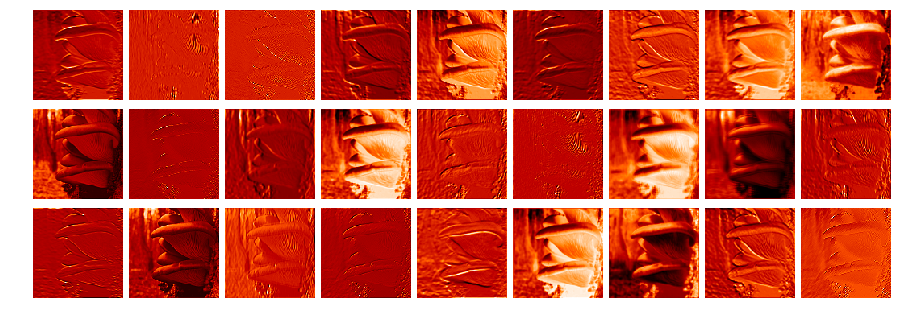

In [25]:
show_conv2d_act()

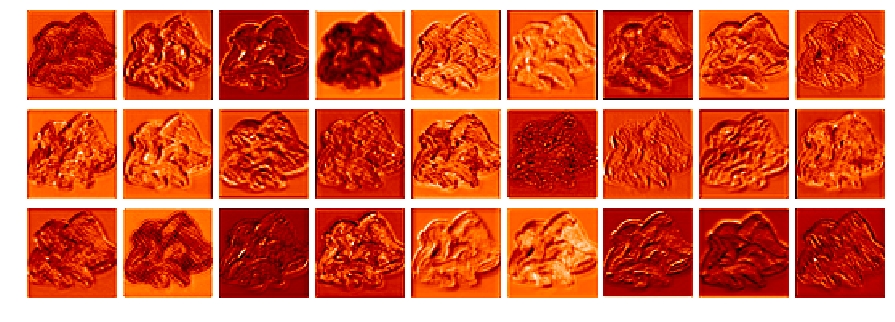

In [23]:
show_conv2d_act(10)